# Mnist

In [0]:
# Step 1:Load the Data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
# X_train[0]

In [0]:
import numpy as np
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
# Step 2: Build the Model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout

L1= 16
L2 = 32
L3 = 64 

model = Sequential()
model.add(Conv2D(L1,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(L2,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10,activation='softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                100416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [0]:
# Step 3 Compile the Model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# Step 4 Train
history = model.fit(X_train,y_train,
                    epochs=10, 
                    shuffle = True,
                    validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 11s 176us/step - loss: 0.3584 - acc: 0.8884 - val_loss: 0.0611 - val_acc: 0.9796
Epoch 2/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.1458 - acc: 0.9571 - val_loss: 0.0509 - val_acc: 0.9845
Epoch 3/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1085 - acc: 0.9687 - val_loss: 0.0374 - val_acc: 0.9868
Epoch 4/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0891 - acc: 0.9733 - val_loss: 0.0323 - val_acc: 0.9887
Epoch 5/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0782 - acc: 0.9762 - val_loss: 0.0304 - val_acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0704 - acc: 0.9791 - val_loss: 0.0275 - val_acc: 0.9899
Epoch 7/10
60000/60

In [0]:
# Step 5 Evaluation
loss, acc = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 49us/step


In [0]:
loss, acc

(0.025351995501754935, 0.9919)

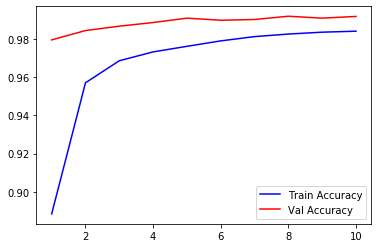

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Val Accuracy')
plt.legend()
plt.show()

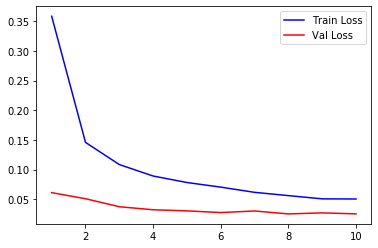

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Val Loss')
plt.legend()
plt.show()

# Ex: CNN on CIFAR10

In [0]:
# Step 1 Preprocess data
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# X_train[0]

In [0]:
# Step 2: Create the Model
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten, Conv2D, MaxPooling2D

L1=32
L2 =64
L3 =128 

model = Sequential()
model.add(Conv2D(L1,(3,3),activation='relu',
                input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(L2,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10,activation='softmax'))


In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [0]:
# Step 3: Compile the Model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Step 4: Train the Model
model.fit(X_train, y_train, 
          shuffle = True,
          epochs = 5, 
          validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 8s 232us/step - loss: 1.6820 - acc: 0.3817 - val_loss: 1.3258 - val_acc: 0.5271
Epoch 2/5
35000/35000 [==============================] - 8s 227us/step - loss: 1.3843 - acc: 0.5021 - val_loss: 1.2021 - val_acc: 0.5795
Epoch 3/5
35000/35000 [==============================] - 8s 227us/step - loss: 1.2668 - acc: 0.5479 - val_loss: 1.0981 - val_acc: 0.6126
Epoch 4/5
35000/35000 [==============================] - 8s 221us/step - loss: 1.1937 - acc: 0.5775 - val_loss: 1.0649 - val_acc: 0.6211
Epoch 5/5
35000/35000 [==============================] - 8s 221us/step - loss: 1.1306 - acc: 0.5980 - val_loss: 0.9928 - val_acc: 0.6557


In [0]:
# Step 5: Evaluate the Model
loss,acc = model.evaluate(X_test, y_test)
loss,acc

10000/10000 [==============================] - 1s 89us/step


(0.9884203165054322, 0.6538)

In [0]:
# Step 6: Save the Model
model.save("./cifar_cnn.h5")

# Case Study: Dogs & Cats

## CNN on Small Dataset: Cats and Dogs

### Import the data

In [0]:
import keras
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = keras.utils.get_file('cats_and_dogs_filtered.zip', origin=URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
path_to_zip

'/root/.keras/datasets/cats_and_dogs_filtered.zip'

In [0]:
PATH = path_to_zip.replace('.zip', '')

In [0]:
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [0]:
train_dir = PATH + '/train'
validation_dir = PATH + '/validation'

In [0]:
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train'

### Image Generator

In [0]:
def generate_even():
  for i in range(10):
    yield i*2

In [0]:
g = generate_even()

In [0]:
next(g)

0

In [0]:
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1/255) 
validation_image_generator = ImageDataGenerator(rescale=1/255) 

In [0]:
BATCH_SIZE = 128
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_data_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

### Visualize the raw images 

In [0]:
batch_images, batch__labels = next(train_data_gen)

In [0]:
batch__labels

array([1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
batch_images.shape

(128, 150, 150, 3)

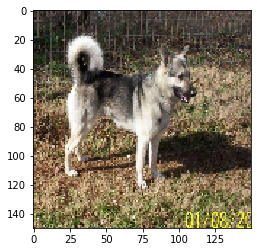

In [0]:
import matplotlib.pyplot as plt
plt.imshow(batch_images[0])

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

### Train the Model

In [0]:
history = model.fit_generator(
    train_data_gen,
    epochs=15,
    validation_data=val_data_gen,
)

Epoch 1/15
15/15 [==============================] - 9s 610ms/step - loss: 0.9276 - acc: 0.4866 - val_loss: 0.6903 - val_acc: 0.5000
Epoch 2/15
15/15 [==============================] - 8s 545ms/step - loss: 0.6888 - acc: 0.5326 - val_loss: 0.6889 - val_acc: 0.5270
Epoch 3/15
15/15 [==============================] - 8s 551ms/step - loss: 0.6648 - acc: 0.5903 - val_loss: 0.7309 - val_acc: 0.5070
Epoch 4/15
15/15 [==============================] - 8s 538ms/step - loss: 0.6471 - acc: 0.6357 - val_loss: 0.6210 - val_acc: 0.6600
Epoch 5/15
15/15 [==============================] - 8s 541ms/step - loss: 0.6120 - acc: 0.6688 - val_loss: 0.5970 - val_acc: 0.6920
Epoch 6/15
15/15 [==============================] - 8s 535ms/step - loss: 0.5252 - acc: 0.7380 - val_loss: 0.5846 - val_acc: 0.6960
Epoch 7/15
15/15 [==============================] - 8s 524ms/step - loss: 0.4825 - acc: 0.7740 - val_loss: 0.6354 - val_acc: 0.6670
Epoch 8/15
15/15 [==============================] - 8s 534ms/step - loss: 0.

### Evaluate the Model

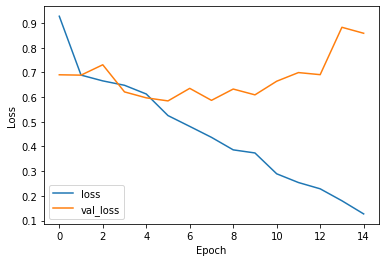

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

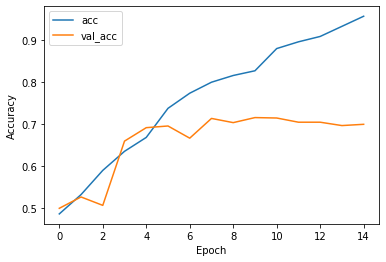

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Data Augmentation

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

#### Flipping

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1/255, 
                               horizontal_flip=True)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [0]:
augmented_images= [train_data_gen[0][0][0] for i in range(5)]

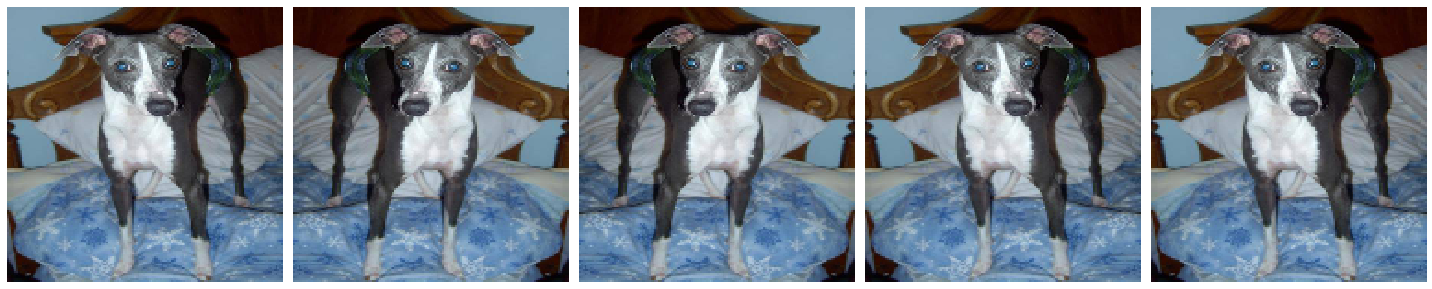

In [0]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images[:5])

#### Rotation

In [0]:
image_gen = ImageDataGenerator(rescale=1/255, 
                               rotation_range=45)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


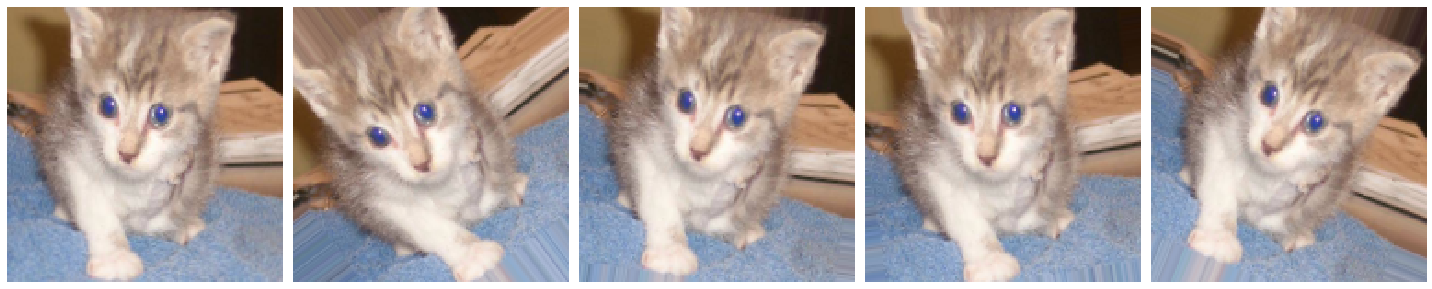

In [0]:
plotImages(augmented_images)

#### Zoom

In [0]:
image_gen = ImageDataGenerator(rescale=1/255, 
                               zoom_range=0.5)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


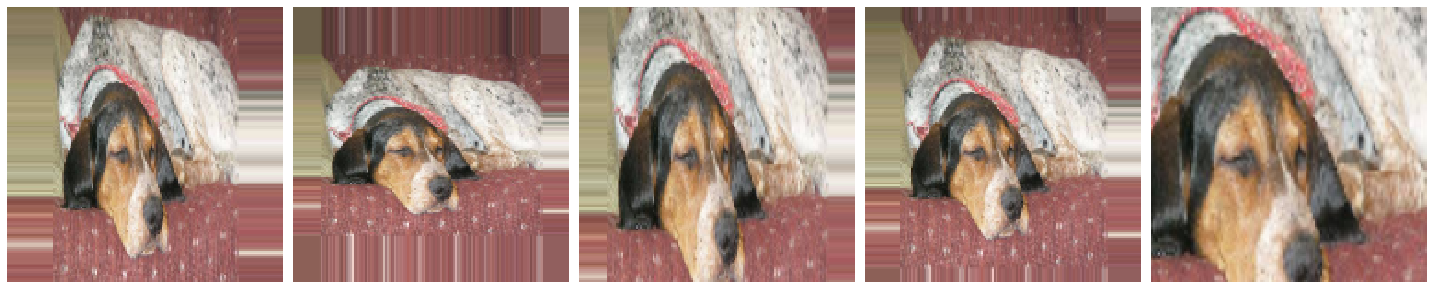

In [0]:
plotImages(augmented_images)

### Applying Data Augumentation

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


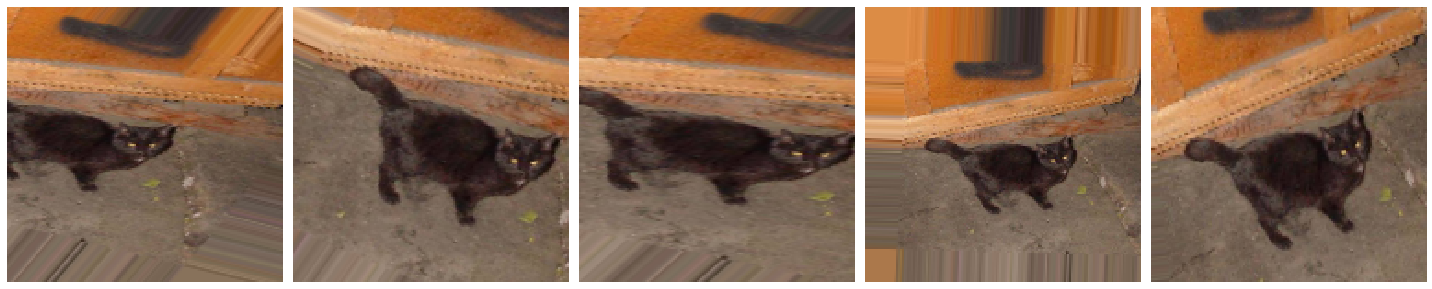

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1/255)

In [0]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 18, 18, 64)       

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

### Train the Model

In [0]:
history = model.fit_generator(
    train_data_gen,
    epochs=15,
    validation_data=val_data_gen
)

Epoch 1/15
16/16 [==============================] - 19s 1s/step - loss: 1.0351 - acc: 0.5175 - val_loss: 0.6917 - val_acc: 0.5010
Epoch 2/15
16/16 [==============================] - 16s 1s/step - loss: 0.6876 - acc: 0.5310 - val_loss: 0.6770 - val_acc: 0.5770
Epoch 3/15
16/16 [==============================] - 16s 994ms/step - loss: 0.6782 - acc: 0.5590 - val_loss: 0.7029 - val_acc: 0.5520
Epoch 4/15
16/16 [==============================] - 16s 999ms/step - loss: 0.6662 - acc: 0.5925 - val_loss: 0.6393 - val_acc: 0.6220
Epoch 5/15
16/16 [==============================] - 16s 1s/step - loss: 0.6514 - acc: 0.6315 - val_loss: 0.6273 - val_acc: 0.6250
Epoch 6/15
16/16 [==============================] - 16s 998ms/step - loss: 0.6367 - acc: 0.6280 - val_loss: 0.6182 - val_acc: 0.6440
Epoch 7/15
16/16 [==============================] - 16s 992ms/step - loss: 0.6231 - acc: 0.6455 - val_loss: 0.6977 - val_acc: 0.5710
Epoch 8/15
16/16 [==============================] - 16s 1s/step - loss: 0.6414

### Evalaute the Model

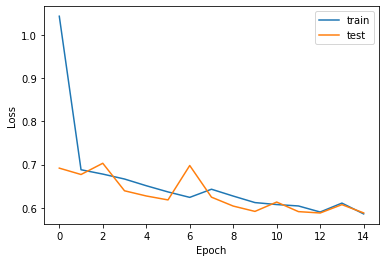

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

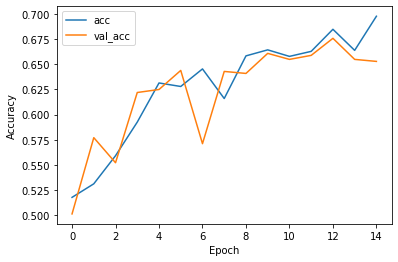

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Ex: CNN with Dropout

In [0]:
cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, 
                    epochs=10,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 166us/sample - loss: 1.5863 - acc: 0.4212 - val_loss: 1.3376 - val_acc: 0.5477
Epoch 2/10
50000/50000 [==============================] - 8s 157us/sample - loss: 1.2690 - acc: 0.5448 - val_loss: 1.1503 - val_acc: 0.6030
Epoch 3/10
50000/50000 [==============================] - 8s 159us/sample - loss: 1.1476 - acc: 0.5917 - val_loss: 1.0592 - val_acc: 0.6457
Epoch 4/10
50000/50000 [==============================] - 8s 164us/sample - loss: 1.0796 - acc: 0.6141 - val_loss: 0.9875 - val_acc: 0.6613
Epoch 5/10
50000/50000 [==============================] - 8s 160us/sample - loss: 1.0329 - acc: 0.6328 - val_loss: 0.9500 - val_acc: 0.6699
Epoch 6/10
50000/50000 [==============================] - 8s 157us/sample - loss: 0.9956 - acc: 0.6479 - val_loss: 0.9762 - val_acc: 0.6631
Epoch 7/10
50000/50000 [==============================] - 8s 161us/sample - loss: 0.9580 - acc: 0.6605 - val_l

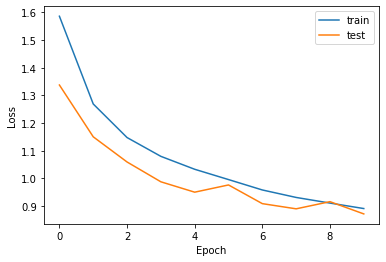

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

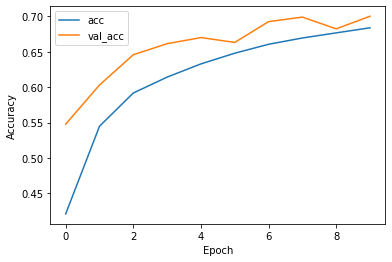

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()